# K-Means Clustering

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.

Below are the 4 steps:

1. Initialisation -- K initial “means” centroids are initialized randomly
2. Euclidian distance -- Computing the euclidian distance from all the centroids and assign the cluster based on the minimal distance to all the centroids
3. Adjusting the centroid -- Adjusting the centroid of each cluster by taking the average of all the data points which belong to that cluster on the basis of the above step calculation
4. Plotting of Clusters -- The clusters are well separated and plotted or each values(observations) are associated with the nearest centroid

In [205]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd

#dictionary for holding key:value pairs from the dataset
from collections import defaultdict

#importing dataset
df=pd.read_csv('Mall_Customers.csv')
X = df.iloc[:, [3, 4]].values
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


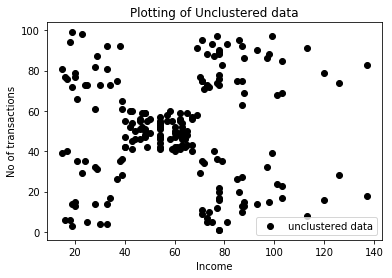

In [203]:
#randomly initialised cluster value as 5
K=5
m=200
Centroids=np.array([]).reshape(2,0)

#Initialized two training data set as Centroids using Kmeans or random initialization
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    

#loop over the number of iterations to perform clustering
no_iter=100
result=defaultdict()
result={}
for n in range(no_iter):
    
    #Computing the euclidian distance from the centroid for each training data
    #Also, based on the minimal distance assigning it to the cluster
    euclidianDist=np.array([]).reshape(m,0)
    for k in range(K):
        tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
        euclidianDist=np.c_[euclidianDist,tempDist]
        
    C=np.argmin(euclidianDist,axis=1)+1
    
    #Next, adjusting the centroid of each cluster by calculating the average of all the training data 
    #Which belonged to that cluster based on the calculation performed above  
    Y={}
    for k in range(K):
        Y[k+1]=np.array([]).reshape(2,0)
    for i in range(m):
        Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
    for k in range(K):
        Y[k+1]=Y[k+1].T
        
    for k in range(K):
        Centroids[:,k]=np.mean(Y[k+1],axis=0)
        
    result=Y
    
#plotting of unclustered data
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('No of transactions')
plt.legend()
plt.title('Plotting of Unclustered data')
plt.show()

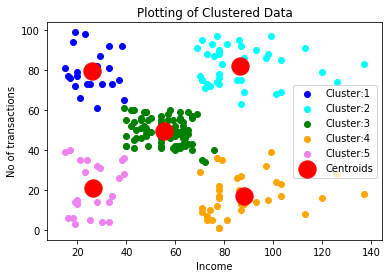

In [204]:
#plotting of clustered data
color=['blue','cyan','green','orange','violet']
labels=['Cluster:1','Cluster:2','Cluster:3','Cluster:4','Cluster:5']

for k in range(K):
    plt.scatter(result[k+1][:,0],result[k+1][:,1],c=color[k],label=labels[k])
    
plt.title("Plotting of Clustered Data")
plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='red',label='Centroids')
plt.xlabel('Income')
plt.ylabel('No of transactions')
plt.legend()
plt.show()

### Reference

https://medium.com/machine-learning-algorithms-from-scratch/k-means-clustering-from-scratch-in-python-1675d38eee42